# Bollenger Band Algo

In [2]:
import numpy as np
import pandas as pd
from pylab import plt
from sklearn import linear_model
plt.style.use('seaborn')
#matplotlib inline

data_url = 'http://hilpisch.com/tr_eikon_eod_data.csv'
raw = pd.read_csv(data_url, index_col=0,parse_dates=True)
raw.dropna(inplace=True)

symbol = 'AAPL.O'

data = pd.DataFrame(raw[symbol])

data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data.dropna(inplace=True)

data['Direction'] = np.sign(data['Returns'])



In [21]:
#next w define a function to do the bollenger band calc
def genBollengerChannels(duration):
    
    # first get the average over the window
    
    data['Strategy_m'] = data[symbol].rolling(window=duration).mean()
    data.dropna(inplace=True)
    
    data['Strategy_h'] = data['Strategy_m'] + np.log(data[symbol].rolling(window=duration).std() * 2)
    data.dropna(inplace=True)
    data['Strategy_l'] = data['Strategy_m'] - np.log(data[symbol].rolling(window=duration).std() * 2)
    data.dropna(inplace=True)
    
    data['MeanReturns_m'] = data['Returns'].rolling(window=duration).mean()
    data.dropna(inplace=True)
    
    data['MeanReturns_h'] = data['MeanReturns_m'] + np.log(data[symbol].rolling(window=duration).std() * 2 )
    data.dropna(inplace=True)
    
    data['MeanReturns_l'] = data['MeanReturns_m'] - np.log(data[symbol].rolling(window=duration).std() * 2 )
    data.dropna(inplace=True)
    

In [17]:
def genSignals():
    
    data['Signal'] = []
    
# I need to make this a single line and have the shift(1) in there
    data['Signal'] = np.where((data[symbol] > data['Strategy_l']) and data['Signal'].shift(1), 1, -1)
#   data['Signal'] = np.where(data[symbol] < data['Strategy_h'], -1, 1)
    
    data['Strategy'] = data['Signal'].shift(1) * data['Returns']
    data.dropna(inplace=True)

    data['Direction'] = np.sign(data['Returns'])

In [32]:
genBollengerChannels(5)
data.head()

,AAPL.O,Returns,Direction,Strategy_m,Strategy_h,Strategy_l,MeanReturns_m,MeanReturns_h,MeanReturns_l
Date,,,,,,,,,
2010-08-30,34.642823,0.003635,1.0,34.491966,33.510663,35.473268,-0.002703,-0.984006,0.978599
2010-08-31,34.728537,0.002471,1.0,34.582537,33.472783,35.692290,0.002625,-1.107128,1.112379
2010-09-01,35.761393,0.029307,1.0,34.795108,34.910257,34.679959,0.006034,0.121183,-0.109115
2010-09-02,36.024250,0.007323,1.0,35.134822,35.474441,34.795203,0.009660,0.349279,-0.329959
2010-09-03,36.967106,0.025836,1.0,35.624822,36.285375,34.964268,0.013715,0.674269,-0.646839


In [23]:
genSignals()

ValueError: Length of values does not match length of index

In [30]:
data.head()

,AAPL.O,Returns,Direction,Strategy_m,Strategy_h,Strategy_l,MeanReturns_m,MeanReturns_h,MeanReturns_l
Date,,,,,,,,,
2010-06-22,39.121389,0.013529,1.0,38.777504,38.566020,38.988989,0.010618,-0.200866,0.222103
2010-06-23,38.709961,-0.010572,-1.0,38.883790,38.179339,39.588240,0.002765,-0.701686,0.707215
2010-06-24,38.428533,-0.007297,-1.0,38.801790,38.363258,39.240322,-0.002123,-0.440655,0.436410
2010-06-25,38.099962,-0.008587,-1.0,38.591104,38.303867,38.878342,-0.005455,-0.292692,0.281783
2010-06-28,38.328533,0.005981,1.0,38.537676,38.296759,38.778592,-0.001389,-0.242306,0.239527


In [ ]:
hit_ratio = data['Signal'].shift(1) == data['Direction']

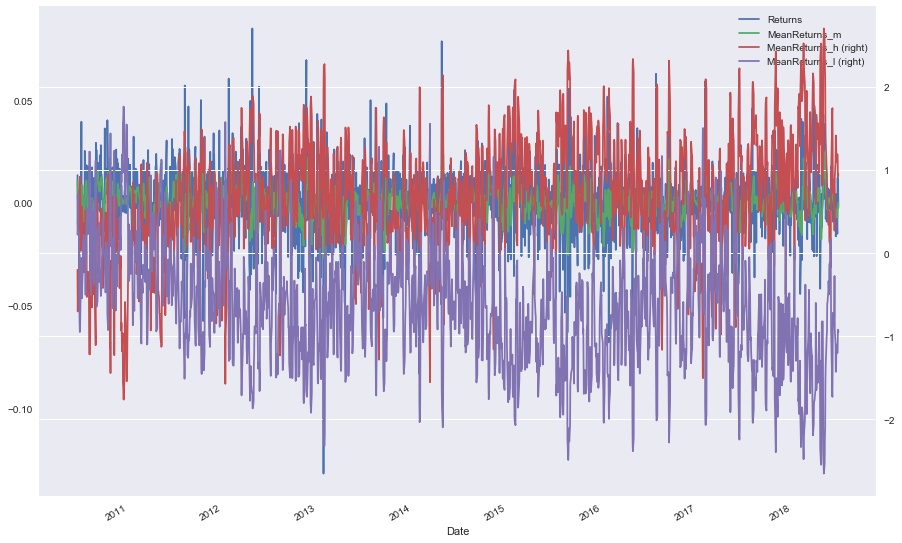

In [29]:
ax = data[['Returns','MeanReturns_m']].plot(figsize=(15,10))
data[['MeanReturns_h', 'MeanReturns_l']].plot(ax = ax, secondary_y=('MeanReturns_h', 'MeanReturns_l'));

In [ ]:
hit_ratio.value_counts()

In [ ]:
data[[symbol,'Strategy_m','Strategy_h','Strategy_l']][1750:].plot(figsize=(15,10), title=symbol)

In [ ]:
data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(15,10))

In [ ]:

hit_ratio